In [215]:
import pandas as pd
import numpy as np
from pandas import Series

import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import *
# from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing

from graphviz import Source
from IPython.display import Image
from ann_visualizer.visualize import ann_viz

import tensorflow as tf
from keras import Sequential
from keras.layers import Embedding, Dense, LSTM, Activation, Dropout, Flatten
from keras.callbacks import ModelCheckpoint

In [216]:
loan = pd.read_csv(r"application_train.csv", sep = ",")
loan = loan.fillna(0)
loan.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [217]:
loan = loan.loc[:,['TARGET',
                   'EXT_SOURCE_3',
                   'EXT_SOURCE_2',
                   'DAYS_BIRTH',
                   'EXT_SOURCE_1',
                   'AMT_CREDIT',
                   'AMT_ANNUITY',
                   'DAYS_ID_PUBLISH',
                   'DAYS_EMPLOYED',
                   'DAYS_LAST_PHONE_CHANGE',
                   'AMT_GOODS_PRICE',
                   'DAYS_REGISTRATION',
                   'SK_ID_CURR',
                   'AMT_INCOME_TOTAL',
                   'REGION_POPULATION_RELATIVE',
                   'HOUR_APPR_PROCESS_START',
                   'OWN_CAR_AGE',
                   'AMT_REQ_CREDIT_BUREAU_YEAR',
                   'TOTALAREA_MODE',
                   'CODE_GENDER_F',
                   'OBS_30_CNT_SOCIAL_CIRCLE',
                   'FLAG_OWN_CAR_N',
                   'NAME_FAMILY_STATUS_Married',
                   'NAME_CONTRACT_TYPE_Cash loans',
                   'AMT_REQ_CREDIT_BUREAU_QRT',
                   'YEARS_BEGINEXPLUATATION_AVG',
                   'LANDAREA_AVG',
                   'NAME_EDUCATION_TYPE_Higher education',
                   'DEF_30_CNT_SOCIAL_CIRCLE',
                   'FLAG_DOCUMENT_3',
                   'APARTMENTS_AVG',
                   'NONLIVINGAREA_AVG',
                   'REGION_RATING_CLIENT_W_CITY',
                   'APARTMENTS_MODE',
                   'BASEMENTAREA_AVG',
                   'BASEMENTAREA_MODE',
                   'OBS_60_CNT_SOCIAL_CIRCLE',
                   'FLAG_WORK_PHONE',
                   'LANDAREA_MODE',
                   'LIVINGAREA_MODE',
                   'LIVINGAREA_AVG',
                   'NONLIVINGAREA_MODE',
                   'NAME_EDUCATION_TYPE_Secondary / secondary special',
                   'YEARS_BEGINEXPLUATATION_MODE',
                   'YEARS_BUILD_AVG',
                   'REG_CITY_NOT_LIVE_CITY',
                   'CODE_GENDER_M',
                   'CNT_FAM_MEMBERS',
                   'LIVINGAPARTMENTS_MODE',
                   'ENTRANCES_AVG',
                   'LIVINGAPARTMENTS_AVG',
                   'NONLIVINGAREA_MEDI',
                   'DEF_60_CNT_SOCIAL_CIRCLE',
                   'YEARS_BEGINEXPLUATATION_MEDI',
                   'ORGANIZATION_TYPE_Self-employed',
                   'LIVINGAREA_MEDI']]

loan = loan.drop('ORGANIZATION_TYPE_Self-employed', axis = 1)
loan = loan.drop('APARTMENTS_MODE', axis = 1)
loan = loan.drop('BASEMENTAREA_MODE', axis = 1)
loan = loan.drop('LIVINGAREA_MODE', axis = 1)
loan = loan.drop('LIVINGAREA_MEDI', axis = 1)
loan = loan.drop('NONLIVINGAREA_MODE', axis = 1)
loan = loan.drop('NONLIVINGAREA_MEDI', axis = 1)
loan = loan.drop('LIVINGAPARTMENTS_MODE', axis = 1)
loan = loan.drop('AMT_REQ_CREDIT_BUREAU_QRT', axis = 1)
loan = loan.drop('AMT_CREDIT', axis = 1)
loan = loan.drop('AMT_INCOME_TOTAL', axis = 1)
loan = loan.drop('OBS_30_CNT_SOCIAL_CIRCLE', axis = 1)
loan = loan.drop('DEF_30_CNT_SOCIAL_CIRCLE', axis = 1)
loan = loan.drop('OBS_60_CNT_SOCIAL_CIRCLE', axis = 1)
loan = loan.drop('DEF_60_CNT_SOCIAL_CIRCLE', axis = 1)
loan = loan.drop(['REGION_POPULATION_RELATIVE'], axis = 1)
loan = loan.drop(['YEARS_BEGINEXPLUATATION_MEDI'], axis = 1)
loan = loan.drop(['YEARS_BEGINEXPLUATATION_MODE'], axis = 1)
loan = loan.drop(['CODE_GENDER_M'], axis = 1)
loan = loan.drop(['LANDAREA_MODE'], axis = 1)
loan = loan.drop(['NONLIVINGAREA_AVG'], axis = 1)



/home/maria/Downloads/yes/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [218]:
loan = loan.fillna(0)
loan.head()

,TARGET,EXT_SOURCE_3,EXT_SOURCE_2,DAYS_BIRTH,EXT_SOURCE_1,AMT_ANNUITY,DAYS_ID_PUBLISH,DAYS_EMPLOYED,DAYS_LAST_PHONE_CHANGE,AMT_GOODS_PRICE,...,REGION_RATING_CLIENT_W_CITY,BASEMENTAREA_AVG,FLAG_WORK_PHONE,LIVINGAREA_AVG,NAME_EDUCATION_TYPE_Secondary / secondary special,YEARS_BUILD_AVG,REG_CITY_NOT_LIVE_CITY,CNT_FAM_MEMBERS,ENTRANCES_AVG,LIVINGAPARTMENTS_AVG
0,1,0.139376,0.262949,-9461,0.083037,24700.5,-2120,-637,-1134.0,351000.0,...,2,0.0369,0,0.0190,0.0,0.6192,0,1.0,0.0690,0.0202
1,0,0.000000,0.622246,-16765,0.311267,35698.5,-291,-1188,-828.0,1129500.0,...,1,0.0529,0,0.0549,0.0,0.7960,0,2.0,0.0345,0.0773
2,0,0.729567,0.555912,-19046,0.000000,6750.0,-2531,-225,-815.0,135000.0,...,2,0.0000,1,0.0000,0.0,0.0000,0,1.0,0.0000,0.0000
3,0,0.000000,0.650442,-19005,0.000000,29686.5,-2437,-3039,-617.0,297000.0,...,2,0.0000,0,0.0000,0.0,0.0000,0,2.0,0.0000,0.0000
4,0,0.000000,0.322738,-19932,0.000000,21865.5,-3458,-3038,-1106.0,513000.0,...,2,0.0000,0,0.0000,0.0,0.0000,0,1.0,0.0000,0.0000


In [219]:
loan.dtypes

TARGET                                                 int64
EXT_SOURCE_3                                         float64
EXT_SOURCE_2                                         float64
DAYS_BIRTH                                             int64
EXT_SOURCE_1                                         float64
AMT_ANNUITY                                          float64
DAYS_ID_PUBLISH                                        int64
DAYS_EMPLOYED                                          int64
DAYS_LAST_PHONE_CHANGE                               float64
AMT_GOODS_PRICE                                      float64
DAYS_REGISTRATION                                    float64
SK_ID_CURR                                             int64
HOUR_APPR_PROCESS_START                                int64
OWN_CAR_AGE                                          float64
AMT_REQ_CREDIT_BUREAU_YEAR                           float64
TOTALAREA_MODE                                       float64
CODE_GENDER_F           

In [220]:
X = loan.drop('TARGET',axis=1)
y = loan['TARGET']

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Decision Tree 

In [222]:
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [223]:
y_pred_tree_train = tree.predict(X_train)
y_pred_tree_train

array([0, 0, 0, ..., 0, 0, 0])

In [224]:
acc = accuracy_score(y_train, y_pred_tree_train)*100
print ('Model Accuracy: {}%'.format(round(acc,2)))

Model Accuracy: 100.0%


In [225]:
y_pred_tree = tree.predict(X_test)
y_pred_tree

array([1, 0, 0, ..., 0, 0, 0])

In [226]:
acc = accuracy_score(y_test, y_pred_tree)*100
print ('Model Accuracy: {}%'.format(round(acc,2)))

Model Accuracy: 85.38%


In [245]:
predictions = [round(value) for value in y_pred_tree]
auc = roc_auc_score(y_test, tree.predict_proba(X_test)[:,1])
print(auc)

0.5390461930033134


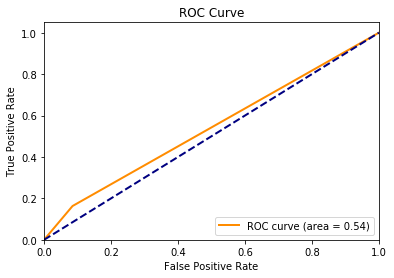

In [228]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [229]:
print('FPR: ',fpr)
print('TPR: ',tpr)
print('Thresholds: ',thresholds)

FPR:  [0.         0.08500666 1.        ]
TPR:  [0.         0.16309904 1.        ]
Thresholds:  [2 1 0]


In [230]:
matrix_tree = confusion_matrix(y_test, y_pred_tree)
matrix_tree

array([[64615,  6003],
       [ 5239,  1021]])

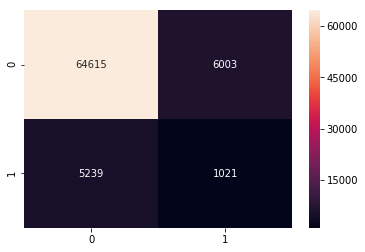

In [231]:
sn.heatmap(matrix_tree, annot=True, fmt="d")

In [232]:
TN = matrix_tree[0][0]
FP = matrix_tree[0][1]
FN = matrix_tree[1][0]
TP = matrix_tree[1][1]

In [233]:
accuracy = (TP+TN)/(TP+TN+FP+FN)
accuracy

0.8537683082286219

In [234]:
TPR = (TP/(TP+FN))*100
print ('True Positive Rate: {}%'.format(round(TPR,2))) 

True Positive Rate: 16.31%


In [235]:
FPR = (FP/(TN+FP))*100
print ('True Positive Rate: {}%'.format(round(FPR,2))) 

True Positive Rate: 8.5%


# XGBoost 

In [236]:
import xgboost as xgb

xg_class = xgb.XGBClassifier(
    gamma=0.9, 
    learning_rate=0.05, 
    max_delta_step=0.9, 
    max_depth=100,
    min_child_weight=40, 
    missing=None, 
    n_estimators=100, 
    nthread=50,
    objective='binary:logistic', 
    reg_alpha=0.9, 
    reg_lambda=0,
    scale_pos_weight=1, 
    seed=1, 
    silent=True, 
    subsample=1)

xg_fit=xg_class.fit(X_train, y_train)

In [246]:
y_pred_xg_train = xg_fit.predict(X_train)
y_pred_xg_train

array([0, 0, 0, ..., 0, 0, 0])

In [247]:
acc = accuracy_score(y_train, y_pred_xg_train)*100
print ('Model Accuracy: {}%'.format(round(acc,2)))

Model Accuracy: 92.19%


In [248]:
y_pred_xg_test = xg_fit.predict(X_test)
y_pred_xg_test

array([0, 0, 0, ..., 0, 0, 0])

In [249]:
acc = accuracy_score(y_test, y_pred_xg_test)*100
print ('Model Accuracy: {}%'.format(round(acc,2)))

Model Accuracy: 91.91%


In [251]:
y_pred_xg = xg_fit.predict(X_test)
predictions = [round(value) for value in y_pred_xg]
auc = roc_auc_score(y_test, xg_class.predict_proba(X_test)[:,1])
print(auc)

0.7441767724870262


In [252]:
matrix_tree_xg = confusion_matrix(y_test, y_pred_xg)
matrix_tree_xg

array([[70563,    55],
       [ 6167,    93]])

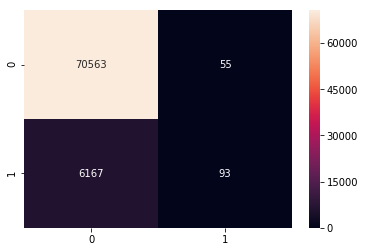

In [253]:
sn.heatmap(matrix_tree_xg, annot=True, fmt="d")

In [201]:
TN = matrix_tree_xg[0][0]
FP = matrix_tree_xg[0][1]
FN = matrix_tree_xg[1][0]
TP = matrix_tree_xg[1][1]
TP

93

In [194]:
TPR = (TP/(TP+FN))
print ('True Positive Rate: {}%'.format(round(TPR*100,2))) 

True Positive Rate: 1.49%


In [195]:
FPR = (FP/(TN+FP))
print ('True Positive Rate: {}%'.format(round(FPR*100,2))) 

True Positive Rate: 0.08%


In [41]:
acc = accuracy_score(y_test, y_pred_xg)*100
print ('Model Accuracy: {}%'.format(round(acc,2)))

Model Accuracy: 91.91%


# Normalization

In [147]:
normalized_X = preprocessing.normalize(X)

In [148]:
normalized_X

array([[ 3.80858584e-07,  7.18533943e-07, -2.58531508e-02, ...,
         2.73260235e-06,  1.88549562e-07,  5.51985675e-08],
       [ 0.00000000e+00,  5.48424731e-07, -1.47760595e-02, ...,
         1.76272705e-06,  3.04070417e-08,  6.81294006e-08],
       [ 4.30954667e-06,  3.28376980e-06, -1.12504624e-01, ...,
         5.90699483e-06,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 2.94667103e-07,  7.21284102e-07, -2.01498965e-02, ...,
         1.34637823e-06,  2.78565655e-07,  1.13230409e-07],
       [ 1.18564770e-06,  9.22230343e-07, -2.14538988e-02, ...,
         3.58730856e-06,  1.23762145e-07,  0.00000000e+00],
       [ 1.39541330e-07,  8.67912278e-07, -2.06465870e-02, ...,
         2.44976115e-06,  8.45167597e-08,  0.00000000e+00]])

In [150]:
df = pd.DataFrame(normalized_X)

In [151]:
df

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,3.808586e-07,7.185339e-07,-0.025853,2.269070e-07,0.067497,-0.005793,-0.001741,-0.003099,0.959143,-0.009969,...,5.465205e-06,1.008330e-07,0.000000e+00,5.191944e-08,0.0,1.692027e-06,0.000000,0.000003,1.885496e-07,5.519857e-08
1,0.000000e+00,5.484247e-07,-0.014776,2.743397e-07,0.031463,-0.000256,-0.001047,-0.000730,0.995500,-0.001045,...,8.813635e-07,4.662413e-08,0.000000e+00,4.838686e-08,0.0,7.015654e-07,0.000000,0.000002,3.040704e-08,6.812940e-08
2,4.309547e-06,3.283770e-06,-0.112505,0.000000e+00,0.039872,-0.014951,-0.001329,-0.004814,0.797444,-0.025164,...,1.181399e-05,0.000000e+00,5.906995e-06,0.000000e+00,0.0,0.000000e+00,0.000000,0.000006,0.000000e+00,0.000000e+00
3,0.000000e+00,2.061366e-06,-0.060230,0.000000e+00,0.094082,-0.007723,-0.009631,-0.001955,0.941246,-0.031163,...,6.338359e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,0.000006,0.000000e+00,0.000000e+00
4,0.000000e+00,6.164622e-07,-0.038072,0.000000e+00,0.041765,-0.006605,-0.005803,-0.002113,0.979881,-0.008234,...,3.820199e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,0.000002,0.000000e+00,0.000000e+00
5,1.331590e-06,7.592759e-07,-0.036313,0.000000e+00,0.058983,-0.001022,-0.003404,-0.005436,0.974215,-0.010653,...,4.286973e-06,0.000000e+00,2.143486e-06,0.000000e+00,0.0,0.000000e+00,0.000000,0.000004,0.000000e+00,0.000000e+00
6,3.516567e-07,5.174152e-07,-0.009847,5.536926e-07,0.029516,-0.000442,-0.002237,-0.001116,0.996954,-0.000867,...,1.429324e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,0.000002,0.000000e+00,0.000000e+00
7,3.524550e-07,4.656418e-07,-0.012288,0.000000e+00,0.027429,-0.001551,-0.000293,-0.000698,0.997414,-0.002997,...,1.955713e-06,0.000000e+00,6.519044e-07,0.000000e+00,0.0,0.000000e+00,0.000000,0.000001,0.000000e+00,0.000000e+00
8,7.595484e-07,2.078889e-07,-0.020308,5.934476e-07,0.034179,-0.003551,0.369045,0.000000,0.923009,-0.007504,...,2.020818e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,0.000002,0.000000e+00,0.000000e+00
9,0.000000e+00,1.785442e-06,-0.034600,0.000000e+00,0.048424,-0.009546,-0.004828,-0.004001,0.968473,-0.034523,...,4.782581e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,0.000002,0.000000e+00,0.000000e+00


In [152]:
y = np.array(y)
y

array([1, 0, 0, ..., 0, 1, 0])

In [154]:
X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, random_state=1)

# Nureal Network

In [155]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=34))
#Second  Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [156]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [158]:
#Fitting the data to the training dataset
classifier.fit(X_train,y_train, batch_size=10, epochs=3)

Epoch 1/3
230633/230633 [==============================] - 19s 81us/step - loss: 0.2836 - acc: 0.9195
Epoch 2/3
230633/230633 [==============================] - 18s 77us/step - loss: 0.2788 - acc: 0.9195
Epoch 3/3
230633/230633 [==============================] - 19s 82us/step - loss: 0.2784 - acc: 0.9195


# RNN

In [84]:
model = Sequential()
model.add(LSTM(128, input_shape=(1, 34), activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

# model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [85]:
# X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
# X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [86]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'],)

In [87]:
model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test))

Train on 230633 samples, validate on 76878 samples
Epoch 1/3
230633/230633 [==============================] - 45s 196us/step - loss: 0.2964 - acc: 0.9192 - val_loss: 0.2796 - val_acc: 0.9186
Epoch 2/3
230633/230633 [==============================] - 44s 192us/step - loss: 0.2790 - acc: 0.9195 - val_loss: 0.2793 - val_acc: 0.9186
Epoch 3/3
230633/230633 [==============================] - 45s 194us/step - loss: 0.2776 - acc: 0.9195 - val_loss: 0.2804 - val_acc: 0.9186


In [88]:
eval_model2=model.evaluate(X_train, y_train)
eval_model2

230633/230633 [==============================] - 8s 37us/step


[0.2781628924611616, 0.9195041472818704]

In [89]:
eval_model2=model.evaluate(X_test, y_test)
eval_model2

76878/76878 [==============================] - 3s 37us/step


[0.28039770493113153, 0.9185722833533959]

In [90]:
y_pred_rnn=model.predict(X_test)
y_pred_rnn

array([[9.55021262e-01, 4.49786671e-02, 1.32944508e-16, ...,
        1.27454623e-16, 2.41382447e-16, 1.28514552e-16],
       [8.94042850e-01, 1.05954610e-01, 2.85718613e-07, ...,
        2.77688287e-07, 3.36548680e-07, 2.94754841e-07],
       [9.36759472e-01, 6.32405877e-02, 5.20150275e-13, ...,
        5.04537493e-13, 8.04034194e-13, 5.17042464e-13],
       ...,
       [8.96888494e-01, 1.03110254e-01, 1.38833784e-07, ...,
        1.34977199e-07, 1.65930601e-07, 1.42924407e-07],
       [9.55949187e-01, 4.40508276e-02, 7.75199921e-17, ...,
        7.44865752e-17, 1.42269229e-16, 7.49197267e-17],
       [9.18887973e-01, 8.11120346e-02, 3.03240044e-10, ...,
        2.92245061e-10, 4.10545986e-10, 3.07522258e-10]], dtype=float32)

In [91]:
y_pred_rnn_df = pd.DataFrame(y_pred_rnn)
y_pred_rnn_df

,0,1,2,3,4,5,6,7,8,9
0,0.955021,0.044979,1.329445e-16,5.830784e-16,2.273477e-16,2.139346e-16,1.693272e-16,1.274546e-16,2.413824e-16,1.285146e-16
1,0.894043,0.105955,2.857186e-07,3.875592e-07,3.010313e-07,3.265985e-07,3.023886e-07,2.776883e-07,3.365487e-07,2.947548e-07
2,0.936759,0.063241,5.201503e-13,1.442831e-12,7.333980e-13,7.343835e-13,6.183657e-13,5.045375e-13,8.040342e-13,5.170425e-13
3,0.941524,0.058476,8.128911e-14,2.498404e-13,1.201242e-13,1.180541e-13,9.770801e-14,7.801947e-14,1.298996e-13,8.012353e-14
4,0.942710,0.057290,5.002511e-14,1.581960e-13,7.475317e-14,7.321397e-14,6.032569e-14,4.792578e-14,8.071976e-14,4.917079e-14
5,0.964110,0.035890,5.115304e-19,3.027460e-18,9.879169e-19,8.995533e-19,6.847540e-19,4.923169e-19,1.037257e-18,4.863530e-19
6,0.928261,0.071739,1.324845e-11,3.077279e-11,1.751509e-11,1.769804e-11,1.528673e-11,1.274874e-11,1.911601e-11,1.331528e-11
7,0.928583,0.071417,1.147117e-11,2.680255e-11,1.520365e-11,1.535730e-11,1.326094e-11,1.106280e-11,1.660172e-11,1.153262e-11
8,0.938714,0.061286,2.621963e-13,7.559933e-13,3.777118e-13,3.735150e-13,3.121115e-13,2.516511e-13,4.092733e-13,2.595344e-13
9,0.945272,0.054728,1.296921e-14,4.353583e-14,1.978372e-14,1.942921e-14,1.586017e-14,1.258468e-14,2.154608e-14,1.271756e-14
